# Morningstar Quantitative Research Coding Project

Thank you for taking the time to finish this project. The project is to write a function that will calculate **rolling beta** of *Apple Stock (NASDAQ:AAPL)* to [Morningstar US Large Cap TR USD](https://indexes.morningstar.com/our-indexes/details/morningstar-us-large-cap-FSUSA00KH5?tab=overview) index. 

There are 3 steps in this project. 

#### Step 1 Data Preparation
Load data from a provided csv file and preprocess data to a clean format expected by step 2. The dataframe return from `preprocess_data` is expected to be two columns with stock data on the first column and index data on the second. Time series is expected to be the index.

#### Step 2 Calcuate Rolling Beta
Beta ($\beta$) is a measure of the volatility, or systematic risk, of a security or portfolio compared to the market as a whole. In [Capital Asset Pricing Model(CAPM)](https://en.wikipedia.org/wiki/Capital_asset_pricing_model) context, beta is expressed as the coefficient of the systematic risk to a security:
$$ E(R_i) = R_f + \beta*(E(R_m) - R_f) $$

where:
- $E(R_i)$ is security expected return
- $E(R_m)$ is market expected return
- $R_f$ is risk free rate

In this project, we assume $R_f$ is constant and is 2% annualized. Since we are calculating the rolling beta, beta becomes a time series and the formula above can be rewritten to:
$$ E(R_i)_t = R_f + \beta_t*(E(R_m)_t - R_f) $$

#### Step 3 Analyze Rolling Beta

Rolling Beta Comparison between stock and index.

## Step 1 Data Preparation

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt  
pd.set_option('display.max_rows', None)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


In [2]:
def load_stock(file_name : str) -> pd.Series:
    
    df_s = pd.read_csv(file_name, index_col='date').rename(columns={'close_adj': 'stock_close'})
    
    series_s = df_s['stock_close']
    series_s.index = pd.to_datetime(series_s.index).to_period('M')
    
    series_s_monthly = series_s.groupby([(series_s.index.year), (series_s.index.month)]).tail(1)
    cropped_series_s_monthly = series_s_monthly[series_s_monthly.index<'2022']
    
    return(cropped_series_s_monthly)
    
    
    
    
    raise NotImplementedError


def load_index(file_name : str) -> pd.Series:
    
    df_i = pd.read_csv(file_name, index_col='date').rename(columns={'close_adj': 'index_close'})
    
    series_i = df_i['index_close']
    series_i.index = pd.to_datetime(series_i.index).to_period('M')
    
    return(series_i)




    raise NotImplementedError

def preprocess_data(stock_data:pd.Series, index_data:pd.Series) -> pd.DataFrame:
    
    df_si = pd.concat([stock_data,index_data], axis=1).sort_index()
    
    df_si['stock_returns'] = df_si['stock_close'].pct_change() - 0.00165158
    df_si['index_returns'] = df_si['index_close'].pct_change() - 0.00165158
    
    df_si = df_si.drop(['stock_close', 'index_close'], axis=1)
    
    df_si = df_si.tail(-1)
    return(df_si)
    
    raise NotImplementedError



Here is a comment on these three functions:
    
The load_stock and load_index functions both take as inputs the adjusted close of Apple and the Morningstar US Large Cap TR USD index.

I trim the data to only get comparable columns: i.e. getting montly data from daily AAPL, and removing dates after 2021.


The preprocess_data function combines the two columns.

I calculate returns from close myself rather than using the premade column.
I substract from the monthly data the monthly risk free rate to get excess returns.



In [3]:
stock_data = load_stock('/Users/pierrevivier/Desktop/stock.csv')
index_data = load_index('/Users/pierrevivier/Desktop/index.csv')

In [4]:
len(stock_data),len(index_data)

(264, 264)

In [5]:
data = preprocess_data(stock_data, index_data)

In [6]:
data

,stock_returns,index_returns
date,,
2000-02,0.103175,-0.018150
2000-03,0.183190,0.093921
2000-04,-0.088180,-0.036059
2000-05,-0.324582,-0.029525
2000-06,0.234956,0.031513
2000-07,-0.023283,-0.018046
2000-08,0.197585,0.064536
2000-09,-0.579091,-0.057569
2000-10,-0.241885,-0.012398


## Step 2 Rolling Regression

Rolling beta is calculated on a rolling window basis, which can be express in the following formula:
$$ \hat{\beta_t} = \frac{\sum_{i=1...N}(X_i – \bar{X}_t) (Y_i – \bar{Y}_t)} {\sum_{i=1...N}(Y_i – \bar{Y}_t)^2} $$

Where X is stock and Y is index

The size of the window $N$ needs to be an argument for the function

#### Note
- There are several open source package available to calculate beta. Candidate is welcomed to use open source packages. However, an extra point will be rewarded for candidates that don't use open source package to achieve this task.
- Brute force way of calculating rolling beta is not the most efficient. A possible improvement can be done in balancing between memory complexity and time complexity. 

In [7]:
# Please Complete the function below to calculate rolling beta
import pandas as pd

def calculate_rolling_beta(data: pd.DataFrame, rolling_window: int) -> pd.Series:
    
    betas = data.rolling(rolling_window).cov().iloc[:,-1].unstack(1).apply(lambda row: row['stock_returns'] / row['index_returns'], axis=1)

    return(betas)
    
    
    raise NotImplementedError

Here is a comment on this function.

The calculate_rolling_beta function takes as input the excess returns for both AAPL and and a rolling window integer.

I then compute the rolling beta, defined as cov(x,y)/var(y).

In [8]:
WINDOW = 20

In [9]:
rolling_beta = calculate_rolling_beta(data, rolling_window=WINDOW)

In [10]:
rolling_beta

date
2000-02         NaN
2000-03         NaN
2000-04         NaN
2000-05         NaN
2000-06         NaN
2000-07         NaN
2000-08         NaN
2000-09         NaN
2000-10         NaN
2000-11         NaN
2000-12         NaN
2001-01         NaN
2001-02         NaN
2001-03         NaN
2001-04         NaN
2001-05         NaN
2001-06         NaN
2001-07         NaN
2001-08         NaN
2001-09    2.203265
2001-10    2.254460
2001-11    2.381639
2001-12    2.379256
2002-01    2.283415
2002-02    2.180042
2002-03    2.176899
2002-04    1.961303
2002-05    1.575585
2002-06    1.780744
2002-07    1.789582
2002-08    1.782889
2002-09    1.212142
2002-10    1.095014
2002-11    1.244516
2002-12    1.157713
2003-01    1.228021
2003-02    1.262476
2003-03    1.247996
2003-04    1.149158
2003-05    1.220775
2003-06    1.199620
2003-07    1.067480
2003-08    1.081372
2003-09    1.125129
2003-10    1.130598
2003-11    1.085600
2003-12    1.185878
2004-01    1.189349
2004-02    0.925577
2004-03    0.66

## Step 3 Analysis

A few related topics to analyze

- Could you visualize what rolling beta looks like? What does it mean when rolling beta is high?
- What is going to happen when rolling window size changes?

In [11]:
def plotting(betas):
    quants = betas.quantile([.1, .5, .9]).to_frame()
    betas.plot(label = 'rolling beta')    

    plt.axhline(betas.quantile(.9),c='g', label = '0.9 quantile') 
    plt.axhline(betas.quantile(.5), c = 'k',label = '0.5')
    plt.axhline(betas.quantile(.1),c = 'r', label ='0.1')                 
                                                                                                                                      
    plt.legend(loc="upper right")
    plt.show()

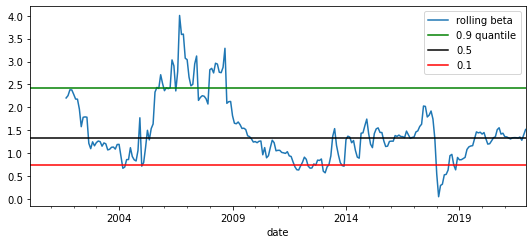

In [12]:
plotting(rolling_beta)

For a rolling window of 20 months, a rolling beta of 2.5 in 2008 means that over the past 20 months, the volatility of AAPL has been 150% higher than that of the Morningstar index. This makes sense, AAPL is volatile.

In [13]:
t = linspace(2000, 2022, len(stock_data))
data1 = stock_data
data2 = index_data
fig, ax1 = plt.subplots()

color = 'green'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('AAPL', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel('MORN', color=color)
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

NameError: name 'linspace' is not defined

A visual of AAPL and the index data.

In this next part I vary the rolling window.

In [ ]:
ten = calculate_rolling_beta(data, rolling_window=10)
twenty = calculate_rolling_beta(data, rolling_window=20)
thirty = calculate_rolling_beta(data, rolling_window=30)
forty = calculate_rolling_beta(data, rolling_window=40)

In [ ]:
def plotwindow():
    
    ten.plot(label = 'ten')
    twenty.plot(label = 'twenty')
    thirty.plot(label = 'thirty')
    forty.plot(label = 'forty')
                                                                                                                                      
    plt.legend(loc="upper right")
    plt.show()

In [ ]:
plotwindow()

In [ ]:
ten.var(),twenty.var(),thirty.var(),forty.var()

As the window gets larger, the rolling beta is going to become increasingly smooth - i.e. the variance of the series of betas will decrease - this makes sense.

This part is just testing - I kept it in in case something is of interest.

In [ ]:
data.rolling(10).cov()

In [ ]:
data.rolling(10).cov().iloc[:,-1]

In [ ]:
data.rolling(rolling_window).cov().iloc[:,-1].unstack(1).apply(lambda row: row['stock_close'] / row['index_close'], axis=1)




In [ ]:
1.291209e+01/1.877487e+04

In [ ]:
calculate_rolling_beta(df, 10)

In [ ]:

a = df.rolling(10).cov(df, pairwise=True).drop(['stock_close'], axis=1).unstack(1).droplevel(0, axis=1).apply(lambda row: row['stock_close'] / row['index_close'], axis=1)
a

In [ ]:
np.cov(stock_data,index_data)

In [ ]:
1.29211757e+05/1.46256069e+07

In [ ]:
data

In [ ]:
pd.read_csv('/Users/pierrevivier/Desktop/index.csv')

In [ ]:
(3994.03000-4061.03000)/4061.03000

In [ ]:
plotting(rolling_beta)